# **0. Importación de <ins>librerías</ins> y <ins>carga de archivos</ins>**

In [1]:
## IMPORTACIÓN DE LIBRERÍAS

import pandas as pd # Pandas
import matplotlib.pyplot as plt # Matplorlib
import matplotlib.colors as mcolors # Matplorlib
from dateutil.relativedelta import relativedelta # Dates
import seaborn as sns #Seaborn
import numpy as np #Numpy
from matplotlib.colors import LinearSegmentedColormap #Paleta de colores


# Desactivamos Warnings
import warnings
warnings.filterwarnings('ignore')

# Conexión con Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
## Cargamos los archivos CSV
import pandas as pd

df_Promos = pd.read_excel('/content/drive/MyDrive/UMPE/15. Datathon/ProdEnPromo-UM.xls')
df_Productos = pd.read_excel('/content/drive/MyDrive/UMPE/15. Datathon/Producto-UM.xls')
df_Ventas = pd.read_excel('/content/drive/MyDrive/UMPE/15. Datathon/VentasPR.xlsx')

# Ahora df1, df2, y df3 son DataFrames de pandas que contienen los datos de cada archivo CSV respectivamente.

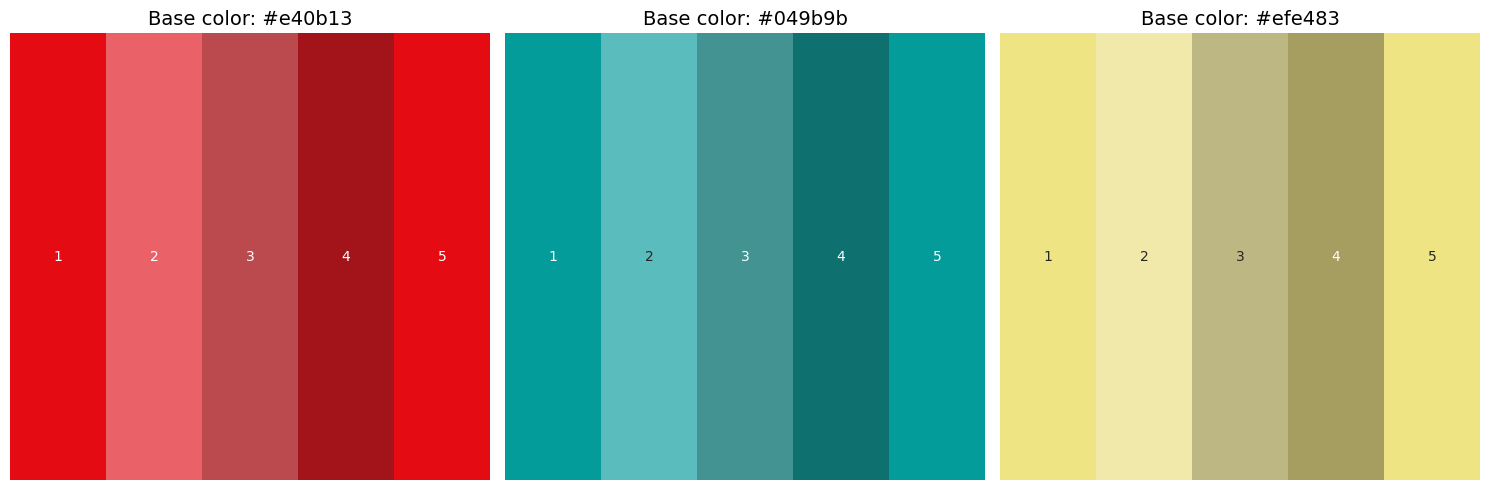

In [3]:
## DEFINICIÓN DE PALETA DE COLORES


# Colores base
colores_base = ['#e40b13', '#049b9b', '#efe483']

# Función para generar colores más claros y más oscuros
def generar_paleta(color_hex, num_colores=5):
    # Convertir el color HEX a RGB
    color_rgb = mcolors.hex2color(color_hex)
    # Generar colores más claros y más oscuros
    paleta = sns.light_palette(color_rgb, n_colors=(num_colores // 2) + 1, reverse=True)[:-1] + \
             sns.dark_palette(color_rgb, n_colors=(num_colores // 2) + 1)[1:]
    return paleta

# Generar las paletas
paletas = [generar_paleta(color) for color in colores_base]

# Crear una función para graficar con degradado
def plot_bar_with_gradient(ax, data, labels, palette, title, ylabel, value_format):
    norm = plt.Normalize(data.min(), data.max())
    colors = [palette[int(norm(value) * (len(palette) - 1))] for value in data]
    bars = ax.bar(labels, data, color=colors)
    for bar, value in zip(bars, data):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), value_format.format(value).replace(',', '.'),
                ha='center', va='bottom', fontsize=10)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel('Mes-Año')
    ax.set_xticklabels(labels, rotation=90)

# Visualizar las paletas
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for ax, paleta, color_base in zip(axs, paletas, colores_base):
    sns.heatmap(np.arange(1, 6).reshape(1, 5), ax=ax, cmap=LinearSegmentedColormap.from_list("", paleta),
                cbar=False, annot=True, xticklabels=False, yticklabels=False)
    ax.set_title(f'Base color: {color_base}', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

---

# **1. Exploración inicial de las bases**

In [4]:
## BASE PROMO

df_Promos

# PRDCODEXT: Código que identifica al producto
# PROMEFFECDES: Fecha desde cunado entró en promoción
# PROMDEFFECHAS: Fecha hasta cuando duró la promoción

# Renombramos columnas
df_Promos.rename(columns={
    'PRDCODEXT': 'ID_producto',
    'PROMDEFFECDES': 'Inicio_promo',
    'PROMDEFFECHAS': 'Fin_promo'
}, inplace=True)

# Convertimos las columnas de fechas en formato "datetime64"
df_Promos['Inicio_promo'] = pd.to_datetime(df_Promos['Inicio_promo'], format='%d/%m/%Y')
df_Promos['Fin_promo'] = pd.to_datetime(df_Promos['Fin_promo'], format='%d/%m/%Y')

# Convertimos "ID_producto" formato String -> Esta variable corresponde a código, por lo cual no deben ser interpretada como variable numérica
df_Promos['ID_producto'] = df_Promos['ID_producto'].astype(float).astype(int).astype(str)

# Creamos la variable "Duracion_promo"
df_Promos['Duracion_promo'] = (df_Promos['Fin_promo'] - df_Promos['Inicio_promo']).dt.days

# Proyectamos Dataframe
df_Promos.head(10)

,ID_producto,Inicio_promo,Fin_promo,Duracion_promo
0,560226,2023-02-13,2023-02-26,13
1,560227,2023-02-13,2023-02-26,13
2,561875,2023-02-13,2023-02-26,13
3,561895,2023-02-13,2023-02-26,13
4,561899,2023-02-13,2023-02-26,13
5,600936,2021-05-17,2021-05-30,13
6,607016,2021-05-17,2021-05-30,13
7,607064,2021-05-17,2021-05-30,13
8,607065,2021-05-17,2021-05-30,13
9,607066,2021-05-17,2021-05-30,13


In [5]:
## BASE PRODUCTO

df_Productos

# Cod: Código que identifica el producto
# Status Hoy: Situación del producto: 1- Activo, 2- Congelado, 3- Congelado para la compra
# Prov: Código que identifica al proveedor
# Cat: 216: Vinos finos, 217 Espumantes
# Tipo Prov: Tipo de proveedor; 1- Provedor Externo, 3- Logistico

# Renombramos columnas
df_Productos.rename(columns={
    'Cod': 'ID_producto',
    'Status Hoy': 'Status',
    'Prov': 'ID_proveedor',
    'Cat ': 'Categoria',
    'Tipo Prov': 'Clasif_proveedor'
}, inplace=True)

# Convertimos "ID_producto", "Status", "ID_proveedor", "Categoria" y "Clasif_proveedor" a formato String -> Estas variables corresponden a códigos, por lo cual no deben ser interpretadas como variables numéricas
df_Productos['ID_producto'] = df_Productos['ID_producto'].astype(float).astype(int).astype(str)
df_Productos['Status'] = df_Productos['Status'].astype(float).astype(int).astype(str)
df_Productos['ID_proveedor'] = df_Productos['ID_proveedor'].astype(float).astype(int).astype(str)
df_Productos['Categoria'] = df_Productos['Categoria'].astype(float).astype(int).astype(str)
df_Productos['Clasif_proveedor'] = df_Productos['Clasif_proveedor'].astype(float).astype(int).astype(str)

# Proyectamos Dataframe
df_Productos.head(10)

,ID_producto,Status,ID_proveedor,Categoria,Clasif_proveedor
0,561699,5,68952,216,1
1,561634,5,68952,216,1
2,561694,5,68952,216,1
3,561826,5,68952,216,1
4,561891,5,68952,216,1
5,561900,5,68952,216,1
6,604124,5,10067,216,1
7,604710,1,10214,216,1
8,560912,5,10214,216,1
9,601047,5,10214,216,1


In [6]:
## BASE VENTAS

df_Ventas

# LOCCOD: Número de Local
# MOVFEC: Fecha de Venta
# PRDCODEXT: Código de producto vendido
# ACPRCANTVEND: Cantidades vendidas
# ACPRIMPVEN: Facturación

# Renombramos columnas
df_Ventas.rename(columns={
    'LOCCOD': 'ID_tienda',
    'MOVFEC': 'Fecha_venta',
    'PRDCODEXT': 'ID_producto',
    'ACPRCANTVEND': 'Cant_vendidas',
    'ACPRIMPVEN': 'Facturacion'
}, inplace=True)

# Convertimos las columnas de fechas en formato "datetime64"
df_Ventas['Fecha_venta'] = pd.to_datetime(df_Ventas['Fecha_venta'], format='%d/%m/%Y')

# Convertimos "ID_producto", "ID_tienda" a formato String -> Estas variables corresponden a códigos, por lo cual no deben ser interpretadas como variables numéricas
df_Ventas['ID_producto'] = df_Ventas['ID_producto'].astype(float).astype(int).astype(str)
df_Ventas['ID_tienda'] = df_Ventas['ID_tienda'].astype(float).astype(int).astype(str)

# Convertimos las columnas "Facturacion" y "Cant_vendidas" a cadena para poder reemplazar comas por puntos
df_Ventas['Facturacion'] = df_Ventas['Facturacion'].astype(str).str.replace(',', '.').astype(float)
df_Ventas['Cant_vendidas'] = df_Ventas['Cant_vendidas'].astype(str).str.replace(',', '.').astype(int)

# Crear la variable "Precio_unidad"
df_Ventas['Precio_unidad'] = df_Ventas['Facturacion'] / df_Ventas['Cant_vendidas']


# Diccionario para denominar los días de semana en español
dias_semana = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

# Creamos la variable "Dia_sem" en español
df_Ventas['Dia_sem'] = df_Ventas['Fecha_venta'].dt.day_name().map(dias_semana)

# Proyectamos Dataframe
df_Ventas.head(10)

,ID_tienda,Fecha_venta,ID_producto,Cant_vendidas,Facturacion,Precio_unidad,Dia_sem
0,5201,2021-05-02,600790,7,1393.0,199.0,Domingo
1,5201,2021-05-02,600793,2,390.0,195.0,Domingo
2,5201,2021-05-02,600794,7,2023.0,289.0,Domingo
3,5201,2021-05-02,605089,1,399.0,399.0,Domingo
4,5201,2021-05-02,605097,1,565.0,565.0,Domingo
5,5201,2021-05-02,605548,1,305.0,305.0,Domingo
6,5201,2021-05-02,607019,1,429.0,429.0,Domingo
7,5201,2021-05-02,607064,2,670.0,335.0,Domingo
8,5201,2021-05-02,607065,1,335.0,335.0,Domingo
9,5201,2021-05-02,607188,1,329.0,329.0,Domingo


---

# **2. <ins>Unificación</ins> y <ins>simplificación</ins> de las bases de datos**

In [7]:
# Realizar el merge entre df_Productos y df_Ventas
df_merged = pd.merge(df_Ventas, df_Productos, on='ID_producto', how='left')

# Proyectamos el dataframe resultante
df_merged.head(10)

,ID_tienda,Fecha_venta,ID_producto,Cant_vendidas,Facturacion,Precio_unidad,Dia_sem,Status,ID_proveedor,Categoria,Clasif_proveedor
0,5201,2021-05-02,600790,7,1393.0,199.0,Domingo,1,31064,216,1
1,5201,2021-05-02,600793,2,390.0,195.0,Domingo,1,31064,216,1
2,5201,2021-05-02,600794,7,2023.0,289.0,Domingo,1,31064,216,1
3,5201,2021-05-02,605089,1,399.0,399.0,Domingo,1,22010,216,1
4,5201,2021-05-02,605097,1,565.0,565.0,Domingo,5,10145,216,1
5,5201,2021-05-02,605548,1,305.0,305.0,Domingo,1,31062,216,1
6,5201,2021-05-02,607019,1,429.0,429.0,Domingo,1,10145,216,1
7,5201,2021-05-02,607064,2,670.0,335.0,Domingo,1,10214,216,1
8,5201,2021-05-02,607065,1,335.0,335.0,Domingo,1,10214,216,1
9,5201,2021-05-02,607188,1,329.0,329.0,Domingo,5,10214,216,1


In [8]:
## Corroboramos que no existan duplicados
df_merged.duplicated().sum()

0

In [9]:
## Eliminamos del Dataframe las DEVOLUCIONES DE PRODUCTOS

# Contar las veces que "Cant_vendidas" es inferior a 0
cant_vendidas_menor_0 = df_merged[df_merged['Cant_vendidas'] < 0].shape[0]
print(f"Número de veces que 'Cant_vendidas' es menor a 0: {cant_vendidas_menor_0}")

# Contar las veces que "Cant_vendidas" es igual a 0
cant_vendidas_igual_0 = df_merged[df_merged['Cant_vendidas'] == 0].shape[0]
print(f"Número de veces que 'Cant_vendidas' es igual a 0: {cant_vendidas_igual_0}")

# Contar las veces que "Cant_vendidas" es nulo
cant_vendidas_nulo = df_merged['Cant_vendidas'].isnull().sum()
print(f"Número de veces que 'Cant_vendidas' es nulo: {cant_vendidas_nulo}")

# Eliminar filas donde "Cant_vendidas" es menor o igual a 0 o es nulo
df_merged_cleaned = df_merged[df_merged['Cant_vendidas'] > 0].dropna(subset=['Cant_vendidas'])

Número de veces que 'Cant_vendidas' es menor a 0: 132
Número de veces que 'Cant_vendidas' es igual a 0: 997
Número de veces que 'Cant_vendidas' es nulo: 0


In [10]:
## Detectamos que variables cuentan con valores faltantes

df_merged.isnull().sum()

ID_tienda             0
Fecha_venta           0
ID_producto           0
Cant_vendidas         0
Facturacion           0
Precio_unidad       192
Dia_sem               0
Status              239
ID_proveedor        239
Categoria           239
Clasif_proveedor    239
dtype: int64

In [11]:
## Eliminamos aquellas ventas donde se presenten valores faltantes para alguna de las variables. Esto se realiza en pos de ejecutar correctamente los modelos de machine learning a posteriori

# Contar el número de filas con algún valor faltante antes de eliminar
valores_faltantes = df_merged.isnull().sum().sum()
print(f"Número de valores faltantes en el dataframe: {valores_faltantes}")

# Eliminar filas con cualquier valor faltante
df_merged = df_merged.dropna()

# Contar el número de filas después de eliminar
print(f"Número de filas después de eliminar valores faltantes: {df_merged.shape[0]}")

Número de valores faltantes en el dataframe: 1148
Número de filas después de eliminar valores faltantes: 144857


In [12]:
## VERIFICACIÓN DE SI UN PRODUCTO VENDIDO SE ENCUENTRA EN PROMO

# Creamos una función para verificar si un producto estaba en promoción en una fecha dada
def verificar_promocion(row):
    producto = row['ID_producto']
    fecha_venta = row['Fecha_venta']
    promocion = df_Promos[(df_Promos['ID_producto'] == producto) &
                          (df_Promos['Inicio_promo'] <= fecha_venta) &
                          (df_Promos['Fin_promo'] >= fecha_venta)]
    return 'Si' if not promocion.empty else 'No'

# Aplicamos la función a cada fila del dataframe
df_merged_cleaned['Promocion'] = df_merged_cleaned.apply(verificar_promocion, axis=1)

# Proyectamos el dataframe resultante
df_merged_cleaned.head(10)

,ID_tienda,Fecha_venta,ID_producto,Cant_vendidas,Facturacion,Precio_unidad,Dia_sem,Status,ID_proveedor,Categoria,Clasif_proveedor,Promocion
0,5201,2021-05-02,600790,7,1393.0,199.0,Domingo,1,31064,216,1,No
1,5201,2021-05-02,600793,2,390.0,195.0,Domingo,1,31064,216,1,No
2,5201,2021-05-02,600794,7,2023.0,289.0,Domingo,1,31064,216,1,No
3,5201,2021-05-02,605089,1,399.0,399.0,Domingo,1,22010,216,1,No
4,5201,2021-05-02,605097,1,565.0,565.0,Domingo,5,10145,216,1,No
5,5201,2021-05-02,605548,1,305.0,305.0,Domingo,1,31062,216,1,No
6,5201,2021-05-02,607019,1,429.0,429.0,Domingo,1,10145,216,1,No
7,5201,2021-05-02,607064,2,670.0,335.0,Domingo,1,10214,216,1,No
8,5201,2021-05-02,607065,1,335.0,335.0,Domingo,1,10214,216,1,No
9,5201,2021-05-02,607188,1,329.0,329.0,Domingo,5,10214,216,1,No


---

# **3. <ins>Análisis estadístico</ins>**



### **3.1 <ins>Distribución cronológica de ventas</ins>**



##### **3.1.1 <ins>Periodo comprendido</ins>**

In [13]:
# Obtenemos la fecha de inicio y fin de ventas
fecha_inicio_ventas = df_Ventas['Fecha_venta'].min().date()
fecha_fin_ventas = df_Ventas['Fecha_venta'].max().date()

# Calculamos el número de días transcurridos entre las fechas de inicio y fin de ventas
dias_transcurridos = (fecha_fin_ventas - fecha_inicio_ventas).days

# Calculamos el número de meses transcurridos entre las fechas de inicio y fin de ventas
meses_transcurridos = relativedelta(fecha_fin_ventas, fecha_inicio_ventas).months + \
                      (relativedelta(fecha_fin_ventas, fecha_inicio_ventas).years * 12) + 1

print(f"Fecha de inicio de ventas: {fecha_inicio_ventas}")
print(f"Fecha de fin de ventas: {fecha_fin_ventas}")
print(f"Número de días transcurridos entre la fecha de inicio y fin de ventas: {dias_transcurridos}")
print(f"Número de meses transcurridos entre la fecha de inicio y fin de ventas: {meses_transcurridos}")

Fecha de inicio de ventas: 2021-05-02
Fecha de fin de ventas: 2024-04-30
Número de días transcurridos entre la fecha de inicio y fin de ventas: 1094
Número de meses transcurridos entre la fecha de inicio y fin de ventas: 36




##### **3.1.2 <ins>Evolución DIARIA de las ventas</ins>** *(cantidad y facturación)*

In [14]:
## ESTADÍSTICAS DESCRIPTIVAS

# Agrupamos por día y calcular la cantidad de ventas y la facturación total
ventas_diarias = df_merged_cleaned.groupby('Fecha_venta').agg({
    'Cant_vendidas': 'sum',
    'Facturacion': 'sum'
}).reset_index()

# Calculamos estadísticas descriptivas para la cantidad de ventas
cant_vendidas_descriptives = ventas_diarias['Cant_vendidas'].describe()
cant_vendidas_IQR = cant_vendidas_descriptives['75%'] - cant_vendidas_descriptives['25%']

# Calculamos estadísticas descriptivas para la facturación
facturacion_descriptives = ventas_diarias['Facturacion'].describe()
facturacion_IQR = facturacion_descriptives['75%'] - facturacion_descriptives['25%']

# Creamos DataFrame para las estadísticas descriptivas
estadisticas_ventas = pd.DataFrame({
    'Estadística': ['Media', 'Mediana', 'Desvío Estándar', 'Q1 (25%)', 'Q3 (75%)', 'IQR'],
    'Cantidad de Ventas': [round(cant_vendidas_descriptives['mean'], 2), round(cant_vendidas_descriptives['50%'], 2), round(cant_vendidas_descriptives['std'], 2), round(cant_vendidas_descriptives['25%'], 2), round(cant_vendidas_descriptives['75%'], 2), round(cant_vendidas_IQR, 2)],
    'Facturación': [f"${facturacion_descriptives['mean']:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'),
                    f"${facturacion_descriptives['50%']:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'),
                    f"${facturacion_descriptives['std']:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'),
                    f"${facturacion_descriptives['25%']:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'),
                    f"${facturacion_descriptives['75%']:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'),
                    f"${facturacion_IQR:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.')]
})

print("\n\nEstadísticas Descriptivas para Ventas Diarias\n")
display(estadisticas_ventas)



Estadísticas Descriptivas para Ventas Diarias



,Estadística,Cantidad de Ventas,Facturación
0,Media,519.87,"$250.891,14"
1,Mediana,205.00,"$75.880,00"
2,Desvío Estándar,1237.97,"$723.962,11"
3,Q1 (25%),149.00,"$56.315,00"
4,Q3 (75%),294.00,"$107.133,00"
5,IQR,145.00,"$50.818,00"


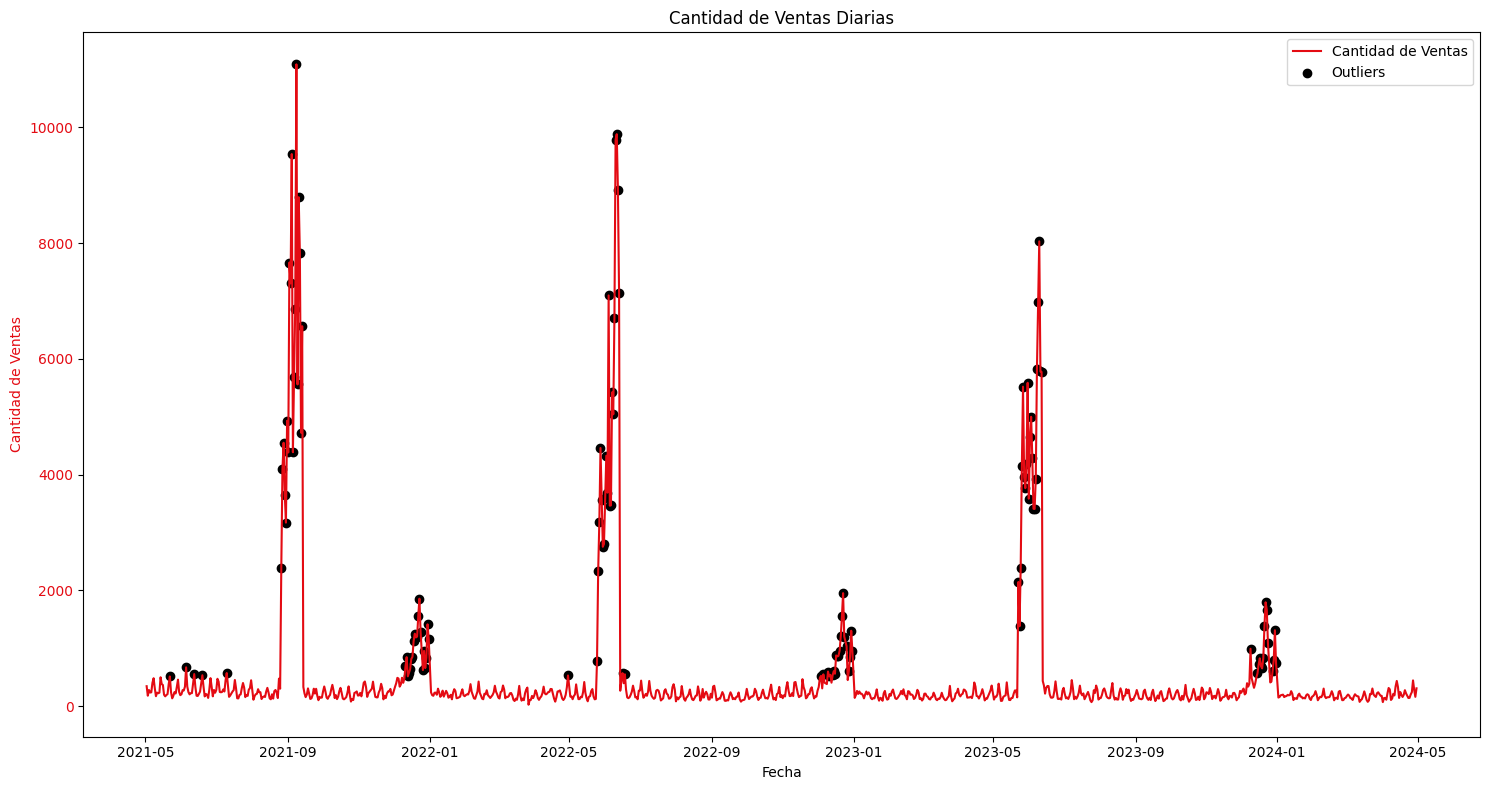

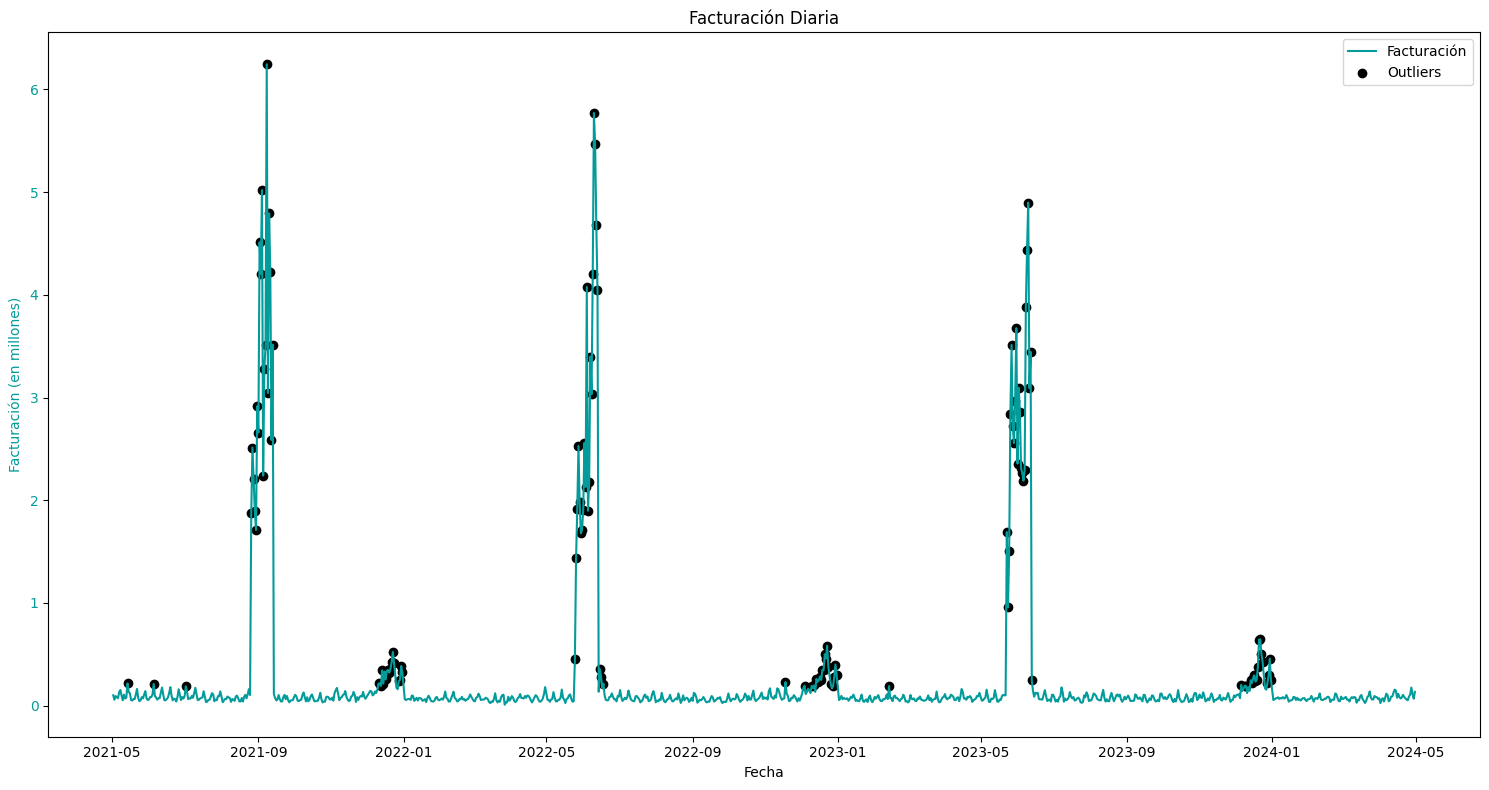

In [15]:
## EVOLUCIÓN FACTURACIÓN, CANTIDADES VENDIDAS POR DIA

# Calculamos los valores atípicos usando el rango intercuartílico (IQR) para la cantidad de ventas
Q1 = ventas_diarias['Cant_vendidas'].quantile(0.25)
Q3 = ventas_diarias['Cant_vendidas'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = Q3 + 1.5 * IQR

# Creamos el gráfico de líneas para la cantidad de ventas diarias
fig, ax1 = plt.subplots(figsize=(15, 8))
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Cantidad de Ventas', color=colores_base[0])
ax1.plot(ventas_diarias['Fecha_venta'], ventas_diarias['Cant_vendidas'], color=colores_base[0], label='Cantidad de Ventas')

# Marcamos los valores atípicos
outliers = ventas_diarias[ventas_diarias['Cant_vendidas'] > outlier_threshold]
ax1.scatter(outliers['Fecha_venta'], outliers['Cant_vendidas'], color='black', label='Outliers')
ax1.tick_params(axis='y', labelcolor=colores_base[0])
plt.title('Cantidad de Ventas Diarias')
plt.legend()
plt.tight_layout()
plt.show()

# Calculamos los valores atípicos usando el rango intercuartílico (IQR) para la facturación
Q1_facturacion = ventas_diarias['Facturacion'].quantile(0.25)
Q3_facturacion = ventas_diarias['Facturacion'].quantile(0.75)
IQR_facturacion = Q3_facturacion - Q1_facturacion
outlier_threshold_facturacion = Q3_facturacion + 1.5 * IQR_facturacion

# Creamos el gráfico de líneas para la facturación diaria
fig, ax2 = plt.subplots(figsize=(15, 8))
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Facturación (en millones)', color=colores_base[1])
ax2.plot(ventas_diarias['Fecha_venta'], ventas_diarias['Facturacion'] / 1e6, color=colores_base[1], label='Facturación')

# Marcamos los valores atípicos para la facturación
outliers_facturacion = ventas_diarias[ventas_diarias['Facturacion'] > outlier_threshold_facturacion]
ax2.scatter(outliers_facturacion['Fecha_venta'], outliers_facturacion['Facturacion'] / 1e6, color='black', label='Outliers')
ax2.tick_params(axis='y', labelcolor=colores_base[1])
plt.title('Facturación Diaria')
plt.legend()
plt.tight_layout()
plt.show()



##### **3.1.3 <ins>Evolución MENSUAL de las ventas</ins>** *(cantidad, facturación y valor de venta promedio)*

In [16]:
## EVOLUCIÓN FACTURACIÓN, CANTIDADES VENDIDAS Y PRECIO MEDIO POR MES

# Creamos nuevas columnas para año y mes
df_merged_cleaned['Año'] = df_merged_cleaned['Fecha_venta'].dt.year
df_merged_cleaned['Mes'] = df_merged_cleaned['Fecha_venta'].dt.month

# Agrupamos por año y mes y calculamos la cantidad de ventas y la facturación total
ventas_mensuales = df_merged_cleaned.groupby(['Año', 'Mes']).agg({
    'Cant_vendidas': 'sum',
    'Facturacion': 'sum'
}).reset_index()

# Calculamos la facturación con y sin promoción
facturacion_promocion = df_merged_cleaned.groupby(['Año', 'Mes', 'Promocion']).agg({
    'Facturacion': 'sum'
}).unstack().fillna(0).reset_index()

# Renombramos las columnas
facturacion_promocion.columns = ['Año', 'Mes', 'Facturacion_con_promo', 'Facturacion_sin_promo']

# Calculamos el porcentaje de facturación con y sin promoción
facturacion_promocion['Facturacion_total'] = facturacion_promocion['Facturacion_con_promo'] + facturacion_promocion['Facturacion_sin_promo']
facturacion_promocion['%_Facturacion_sin_promo'] = (facturacion_promocion['Facturacion_sin_promo'] / facturacion_promocion['Facturacion_total']) * 100
facturacion_promocion['%_Facturacion_con_promo'] = (facturacion_promocion['Facturacion_con_promo'] / facturacion_promocion['Facturacion_total']) * 100

# Unimos los datos de facturación con y sin promoción con el dataframe de ventas mensuales
ventas_mensuales = ventas_mensuales.merge(facturacion_promocion, on=['Año', 'Mes'], how='left')

# Calculamos el precio medio
ventas_mensuales['Precio_medio'] = ventas_mensuales['Facturacion'] / ventas_mensuales['Cant_vendidas']

# Formateamos las columnas
ventas_mensuales['Cant_vendidas'] = ventas_mensuales['Cant_vendidas'].apply(lambda x: f"{x:,}".replace(',', '.'))
ventas_mensuales['Facturacion'] = ventas_mensuales['Facturacion'].apply(lambda x: f"${x:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'))
ventas_mensuales['Precio_medio'] = ventas_mensuales['Precio_medio'].apply(lambda x: f"${x:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'))
ventas_mensuales['Facturacion_sin_promo'] = ventas_mensuales.apply(lambda row: f"${row['Facturacion_sin_promo']:,.2f} ({row['%_Facturacion_sin_promo']:.1f}%)".replace(',', 'X').replace('.', ',').replace('X', '.'), axis=1)
ventas_mensuales['Facturacion_con_promo'] = ventas_mensuales.apply(lambda row: f"${row['Facturacion_con_promo']:,.2f} ({row['%_Facturacion_con_promo']:.1f}%)".replace(',', 'X').replace('.', ',').replace('X', '.'), axis=1)

# Seleccionamos las columnas deseadas
columnas_deseadas = ['Año', 'Mes', 'Cant_vendidas', 'Facturacion', 'Precio_medio', 'Facturacion_sin_promo', 'Facturacion_con_promo']
ventas_mensuales_formateadas = ventas_mensuales[columnas_deseadas]

# Ordenamos por facturación y seleccionar el top 10
ventas_mensuales_formateadas['Facturacion_numerica'] = ventas_mensuales['Facturacion'].apply(lambda x: float(x.replace('$', '').replace('.', '').replace(',', '.')))
ventas_mensuales_top10 = ventas_mensuales_formateadas.sort_values(by='Facturacion_numerica', ascending=False).head(10).drop(columns=['Facturacion_numerica'])
ventas_mensuales_top10

,Año,Mes,Cant_vendidas,Facturacion,Precio_medio,Facturacion_sin_promo,Facturacion_con_promo
4,2021,9,93.837,"$50.957.526,30","$543,04","$46.355.473,94 (91,0%)","$4.602.052,36 (9,0%)"
13,2022,6,83.269,"$47.387.106,63","$569,08","$1.474.775,11 (3,1%)","$45.912.331,52 (96,9%)"
25,2023,6,65.052,"$38.864.679,04","$597,44","$34.333.988,54 (88,3%)","$4.530.690,50 (11,7%)"
24,2023,5,37.090,"$24.046.139,04","$648,32","$19.998.253,11 (83,2%)","$4.047.885,93 (16,8%)"
3,2021,8,28.205,"$14.944.821,98","$529,86","$12.394.855,25 (82,9%)","$2.549.966,73 (17,1%)"
12,2022,5,24.270,"$13.278.044,72","$547,10","$403.913,76 (3,0%)","$12.874.130,96 (97,0%)"
31,2023,12,19.898,"$7.469.295,04","$375,38","$1.880.577,77 (25,2%)","$5.588.717,27 (74,8%)"
19,2022,12,22.072,"$7.373.954,45","$334,09","$2.614.014,47 (35,4%)","$4.759.939,98 (64,6%)"
7,2021,12,24.049,"$7.260.129,80","$301,89","$1.901.783,10 (26,2%)","$5.358.346,70 (73,8%)"
0,2021,5,8.454,"$2.770.089,20","$327,67","$55.407,00 (2,0%)","$2.714.682,20 (98,0%)"


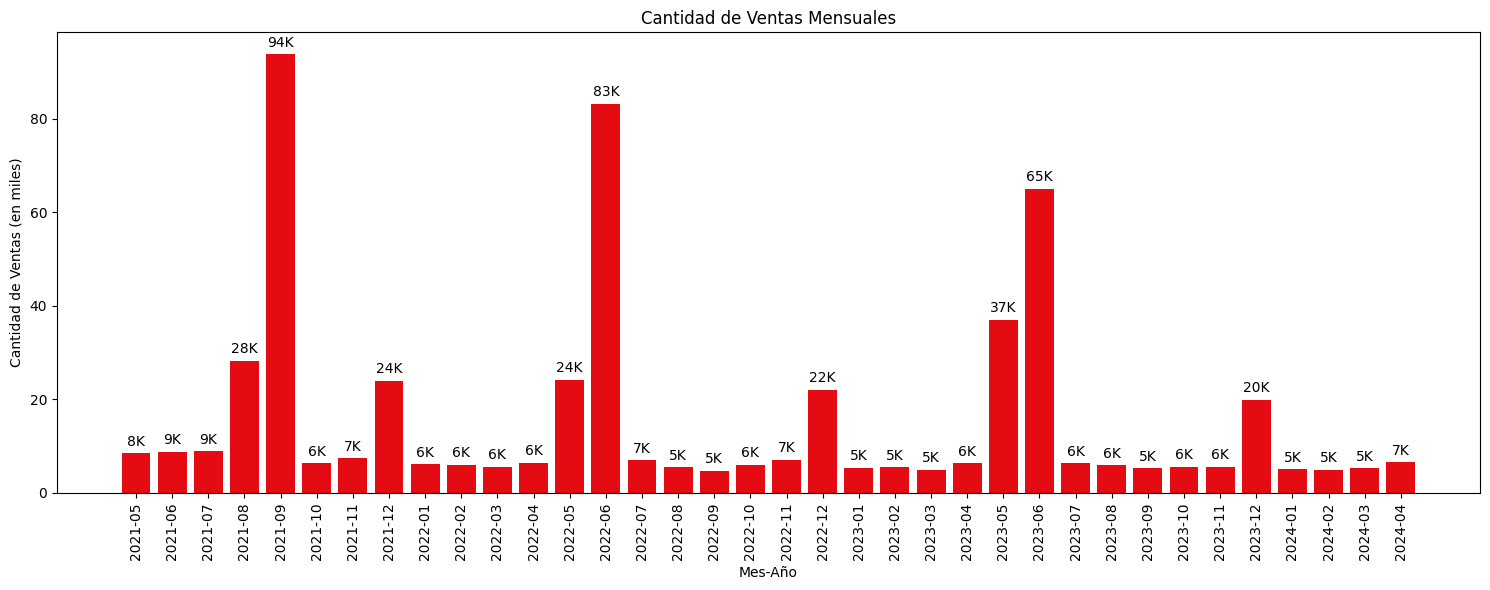

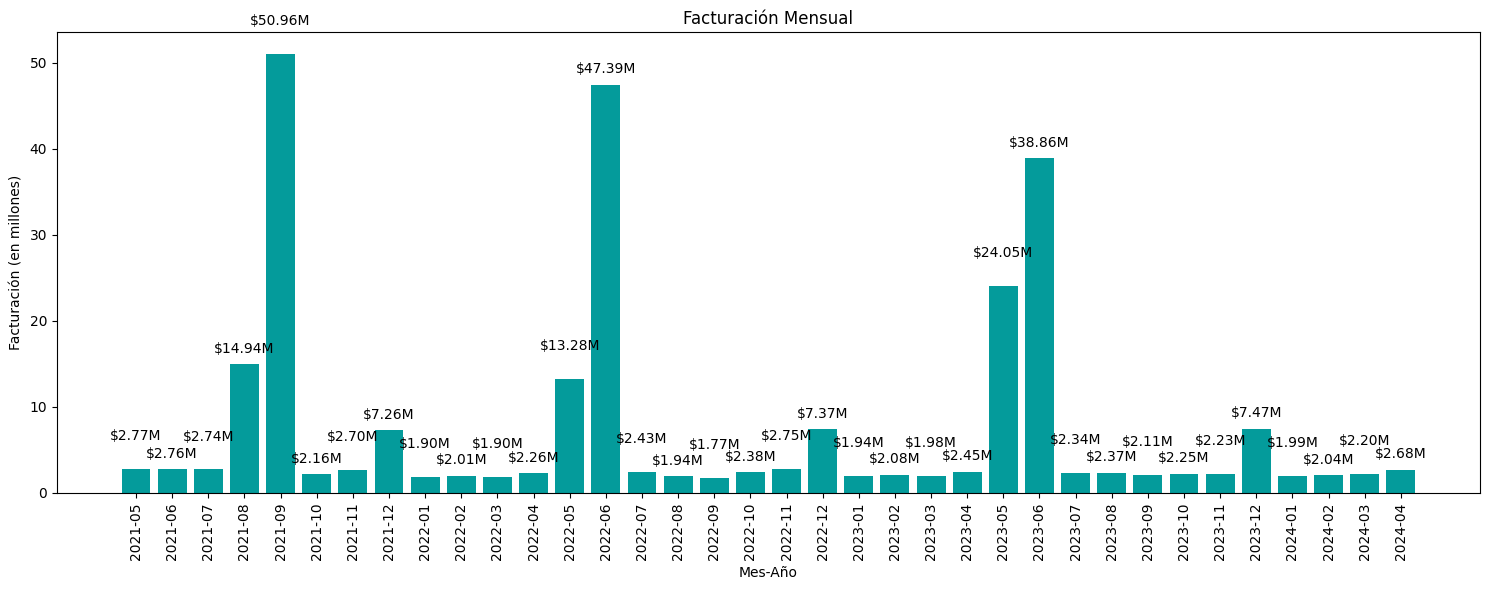

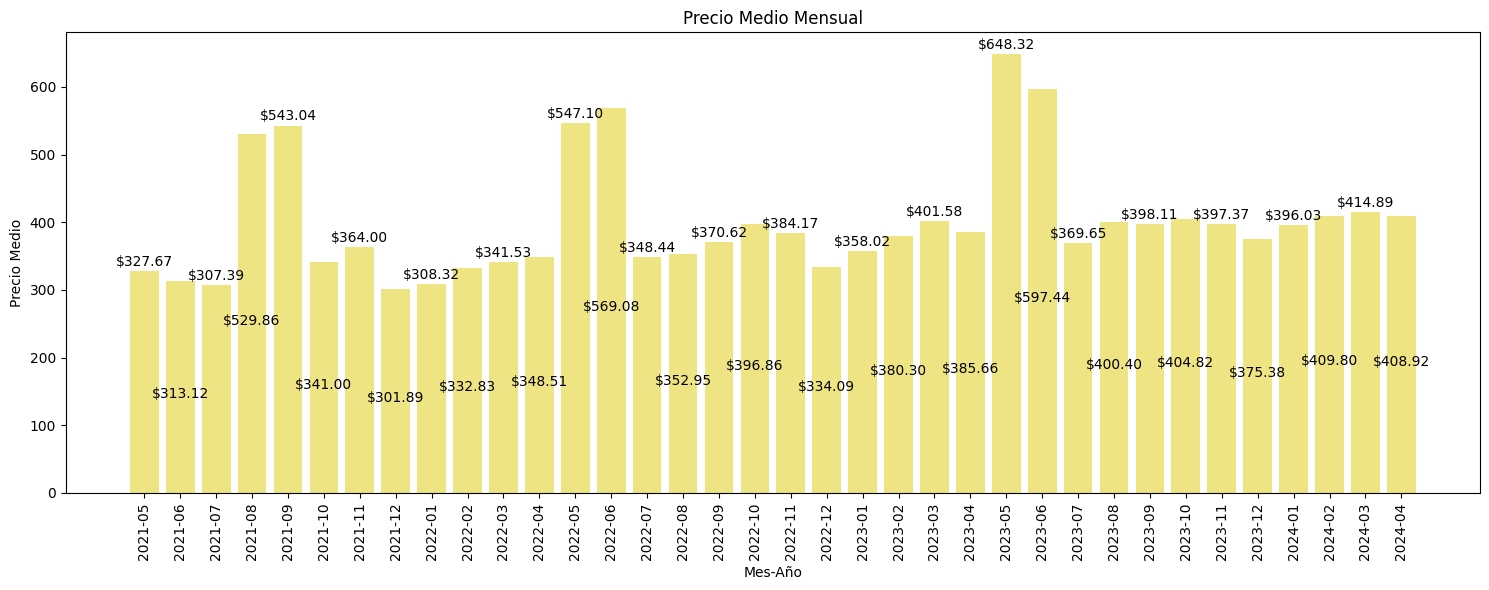

In [17]:
## GRÁFICO FACTURACIÓN, CANTIDADES VENDIDAS Y PRECIO MEDIO POR MES

# Crear una función para graficar barras con colores específicos
def plot_bar_with_colors(ax, data, labels, color, title, ylabel, value_format, scale=1, intercalate=False, all_above=False):
    bars = ax.bar(range(len(labels)), data / scale, color=color)
    for i, (bar, value) in enumerate(zip(bars, data)):
        formatted_value = value_format.format(value / scale).replace(',', '.')
        if all_above:
            va = 'bottom'
            offset = bar.get_height() + 3 if i % 2 == 0 else bar.get_height() + 1
        elif intercalate:
            if i % 2 == 0:
                va = 'bottom'
                offset = bar.get_height() + 3
            else:
                va = 'top'
                offset = bar.get_height() - 3 if title == 'Facturación Mensual' else bar.get_height() / 2
        else:
            va = 'bottom'
            offset = bar.get_height() + 1
        ax.text(bar.get_x() + bar.get_width() / 2, offset, formatted_value,
                ha='center', va=va, fontsize=10)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel('Mes-Año')
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=90)

# Crear la figura y el eje para la cantidad de VENTAS MENSUALES
fig, ax = plt.subplots(figsize=(15, 6))
labels = ventas_mensuales_formateadas.apply(lambda x: f"{int(x['Año'])}-{int(x['Mes']):02d}", axis=1)
data_cant_vendidas = ventas_mensuales_formateadas['Cant_vendidas'].apply(lambda x: int(x.replace('.', '').replace(',', '')))
plot_bar_with_colors(ax, data_cant_vendidas, labels, colores_base[0], 'Cantidad de Ventas Mensuales', 'Cantidad de Ventas (en miles)', '{:,.0f}K', scale=1000)
plt.tight_layout()
plt.show()

# Crear la figura y el eje para la FACTURACIÓN MENSUAL
fig, ax = plt.subplots(figsize=(15, 6))
data_facturacion = ventas_mensuales_formateadas['Facturacion'].apply(lambda x: float(x.replace('$', '').replace('.', '').replace(',', '.')))
plot_bar_with_colors(ax, data_facturacion, labels, colores_base[1], 'Facturación Mensual', 'Facturación (en millones)', '${:,.2f}M', scale=1e6, all_above=True)
plt.tight_layout()
plt.show()

# Crear la figura y el eje para el PRECIO MEDIO MENSUAL
fig, ax = plt.subplots(figsize=(15, 6))
data_precio_medio = ventas_mensuales_formateadas['Precio_medio'].apply(lambda x: float(x.replace('$', '').replace('.', '').replace(',', '.')))
plot_bar_with_colors(ax, data_precio_medio, labels, colores_base[2], 'Precio Medio Mensual', 'Precio Medio', '${:,.2f}', intercalate=True)
plt.tight_layout()
plt.show()



##### **3.1.4 <ins>Evolución SEMANAL de las ventas</ins>** *(cantidad, facturación y valor de venta promedio)*

In [18]:
## EVOLUCIÓN FACTURACIÓN, CANTIDADES VENDIDAS Y PRECIO MEDIO POR SEMANA

# Definimos el orden de los días de la semana
dias_semana_orden = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Agrupamos por día de la semana y calculamos la cantidad de ventas y la facturación total
ventas_semanales = df_merged_cleaned.groupby('Dia_sem').agg({
    'Cant_vendidas': 'sum',
    'Facturacion': 'sum'
}).reindex(dias_semana_orden).reset_index()

# Calculamos la facturación con y sin promoción
facturacion_promocion_semanal = df_merged_cleaned.groupby(['Dia_sem', 'Promocion']).agg({
    'Facturacion': 'sum'
}).unstack().fillna(0).reset_index()

# Renombramos las columnas
facturacion_promocion_semanal.columns = ['Dia_sem', 'Facturacion_con_promo', 'Facturacion_sin_promo']

# Calculamos el porcentaje de facturación con y sin promoción
facturacion_promocion_semanal['Facturacion_total'] = facturacion_promocion_semanal['Facturacion_con_promo'] + facturacion_promocion_semanal['Facturacion_sin_promo']
facturacion_promocion_semanal['%_Facturacion_sin_promo'] = (facturacion_promocion_semanal['Facturacion_sin_promo'] / facturacion_promocion_semanal['Facturacion_total']) * 100
facturacion_promocion_semanal['%_Facturacion_con_promo'] = (facturacion_promocion_semanal['Facturacion_con_promo'] / facturacion_promocion_semanal['Facturacion_total']) * 100

# Unimos los datos de facturación con y sin promoción con el dataframe de ventas semanales
ventas_semanales = ventas_semanales.merge(facturacion_promocion_semanal, on='Dia_sem', how='left')

# Calculamos el precio medio
ventas_semanales['Precio_medio'] = ventas_semanales['Facturacion'] / ventas_semanales['Cant_vendidas']

# Formateamos las columnas
ventas_semanales['Cant_vendidas'] = ventas_semanales['Cant_vendidas'].apply(lambda x: f"{x:,}".replace(',', '.'))
ventas_semanales['Facturacion'] = ventas_semanales['Facturacion'].apply(lambda x: f"${x:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'))
ventas_semanales['Precio_medio'] = ventas_semanales['Precio_medio'].apply(lambda x: f"${x:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'))
ventas_semanales['Facturacion_sin_promo'] = ventas_semanales.apply(lambda row: f"${row['Facturacion_sin_promo']:,.2f} ({row['%_Facturacion_sin_promo']:.1f}%)".replace(',', 'X').replace('.', ',').replace('X', '.'), axis=1)
ventas_semanales['Facturacion_con_promo'] = ventas_semanales.apply(lambda row: f"${row['Facturacion_con_promo']:,.2f} ({row['%_Facturacion_con_promo']:.1f}%)".replace(',', 'X').replace('.', ',').replace('X', '.'), axis=1)

# Seleccionamos las columnas deseadas
columnas_deseadas = ['Dia_sem', 'Cant_vendidas', 'Facturacion', 'Precio_medio', 'Facturacion_sin_promo', 'Facturacion_con_promo']
ventas_semanales_formateadas = ventas_semanales[columnas_deseadas]

# Ordenamos por el orden de los días de la semana
ventas_semanales_formateadas = ventas_semanales_formateadas.set_index('Dia_sem').reindex(dias_semana_orden).reset_index()

# Mostramos el DataFrame resultante
ventas_semanales_formateadas

,Dia_sem,Cant_vendidas,Facturacion,Precio_medio,Facturacion_sin_promo,Facturacion_con_promo
0,Lunes,67.618,"$33.805.383,97","$499,95","$17.309.797,70 (51,2%)","$16.495.586,27 (48,8%)"
1,Martes,57.650,"$28.901.595,83","$501,33","$12.576.669,18 (43,5%)","$16.324.926,65 (56,5%)"
2,Miércoles,66.840,"$33.064.185,90","$494,68","$16.961.688,38 (51,3%)","$16.102.497,52 (48,7%)"
3,Jueves,76.274,"$38.197.904,75","$500,80","$18.411.493,81 (48,2%)","$19.786.410,94 (51,8%)"
4,Viernes,98.119,"$48.027.246,51","$489,48","$23.089.162,42 (48,1%)","$24.938.084,09 (51,9%)"
5,Sábado,116.684,"$53.861.152,31","$461,60","$23.477.367,75 (43,6%)","$30.383.784,56 (56,4%)"
6,Domingo,81.914,"$36.861.201,20","$450,00","$15.582.960,34 (42,3%)","$21.278.240,86 (57,7%)"


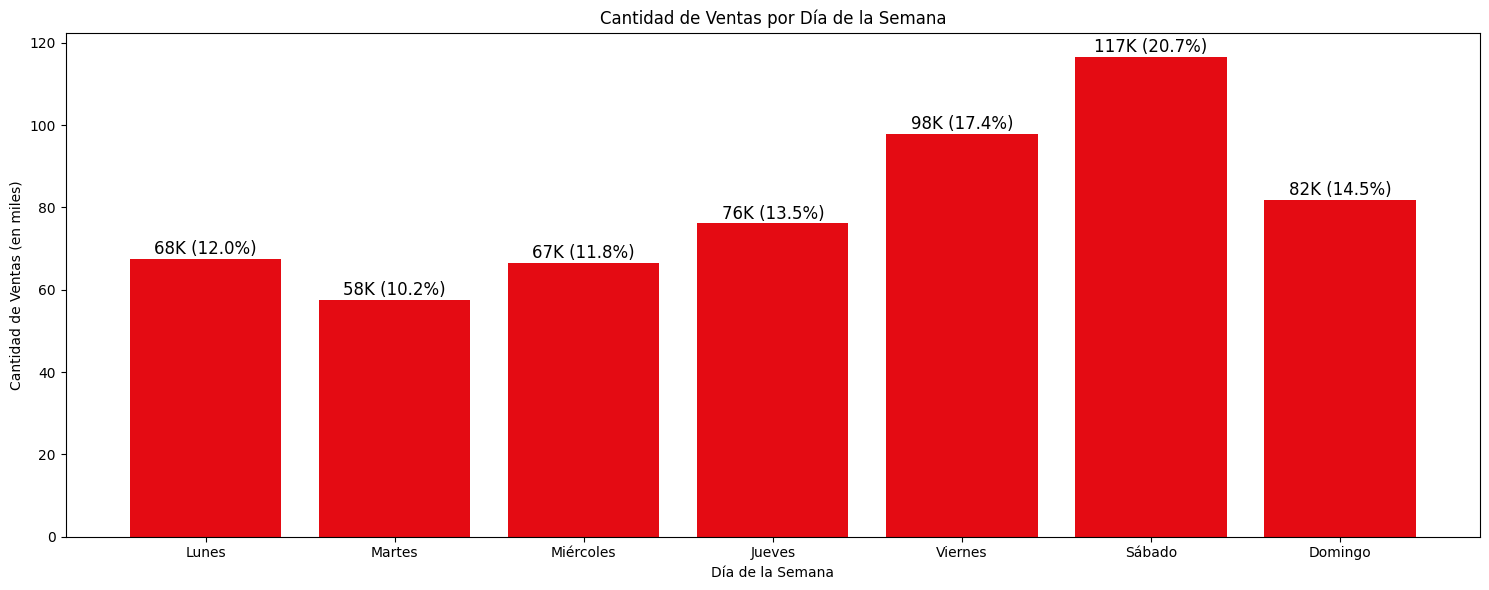

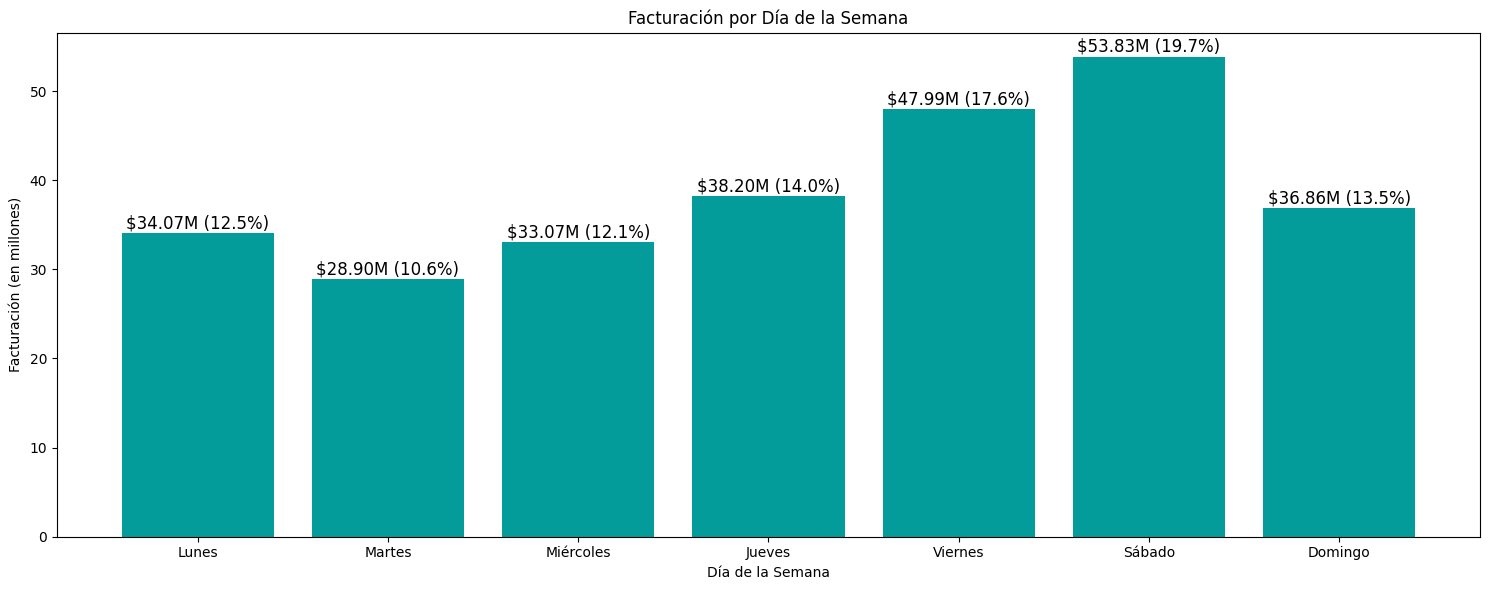

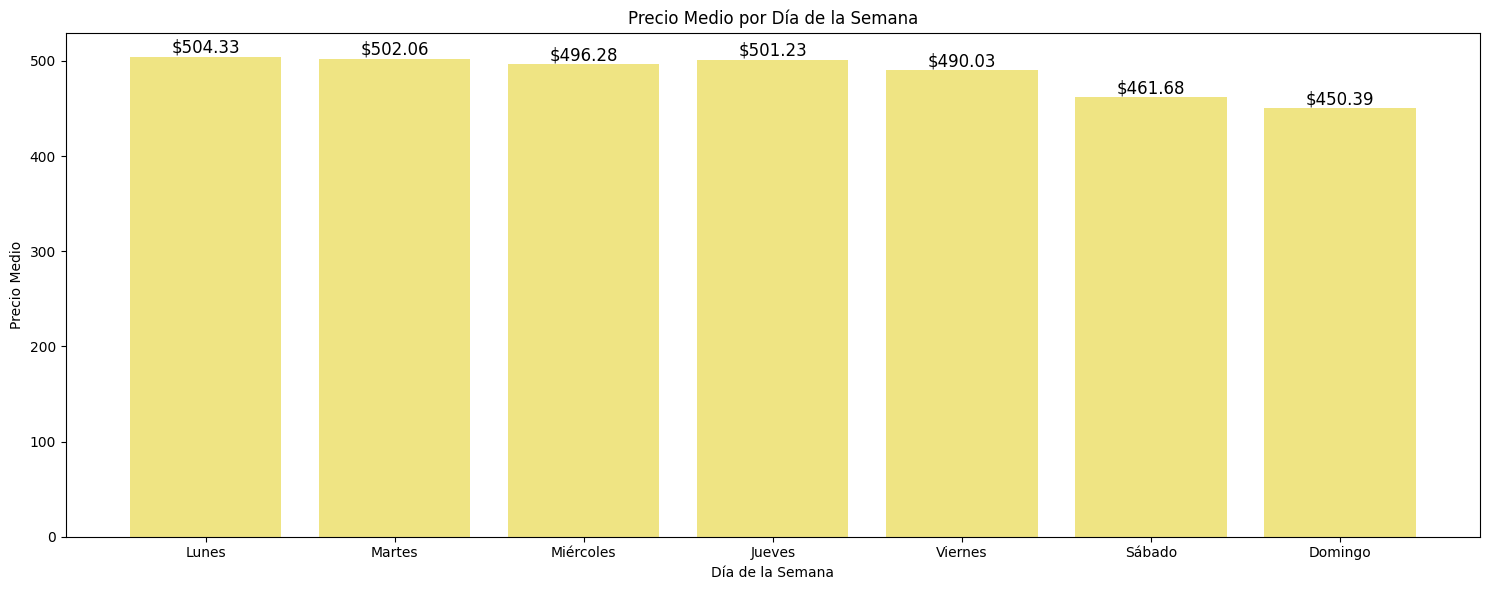

In [19]:
## GRÁFICO FACTURACIÓN, CANTIDADES VENDIDAS Y PRECIO MEDIO POR DÍA DE SEMANA

# Creamos una función para graficar barras con colores específicos
def plot_bar_with_colors_days(ax, data, labels, color, title, ylabel, value_format, scale=1, show_percentage=False, total=None):
    bars = ax.bar(labels, data / scale, color=color)
    for bar, value in zip(bars, data):
        if show_percentage and total:
            percentage = f" ({(value / total * 100):.1f}%)"
        else:
            percentage = ""
        formatted_value = value_format.format(value / scale).replace(',', '.')
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, formatted_value + percentage,
                ha='center', va='bottom', fontsize=12)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel('Día de la Semana')
    ax.set_xticklabels(labels, rotation=0)

# Ordenamos de los días de la semana
dias_semana_orden = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Graficamos la cantidad de VENTAS POR DÍA DE LA SEMANA
fig, ax = plt.subplots(figsize=(15, 6))
data_cant_vendidas = df_Ventas.groupby('Dia_sem')['Cant_vendidas'].sum().reindex(dias_semana_orden)
total_cant_vendidas = data_cant_vendidas.sum()
plot_bar_with_colors_days(ax, data_cant_vendidas, dias_semana_orden, colores_base[0], 'Cantidad de Ventas por Día de la Semana', 'Cantidad de Ventas (en miles)', '{:,.0f}K', scale=1000, show_percentage=True, total=total_cant_vendidas)
plt.tight_layout()
plt.show()

# Graficamos la FACTURACIÓN POR DÍA DE LA SEMANA
fig, ax = plt.subplots(figsize=(15, 6))
data_facturacion = df_Ventas.groupby('Dia_sem')['Facturacion'].sum().reindex(dias_semana_orden)
total_facturacion = data_facturacion.sum()
plot_bar_with_colors_days(ax, data_facturacion, dias_semana_orden, colores_base[1], 'Facturación por Día de la Semana', 'Facturación (en millones)', '${:,.2f}M', scale=1e6, show_percentage=True, total=total_facturacion)
plt.tight_layout()
plt.show()

# Graficamos el PRECIO MEDIO POR DÍA DE LA SEMANA
fig, ax = plt.subplots(figsize=(15, 6))
data_precio_medio = (df_Ventas.groupby('Dia_sem')['Facturacion'].sum() / df_Ventas.groupby('Dia_sem')['Cant_vendidas'].sum()).reindex(dias_semana_orden)
plot_bar_with_colors_days(ax, data_precio_medio, dias_semana_orden, colores_base[2], 'Precio Medio por Día de la Semana', 'Precio Medio', '${:,.2f}')
plt.tight_layout()
plt.show()



##### **3.1.5 Distribución de ventas <ins>por categoría</ins>**

In [20]:
## DISTRIBUCIÓN DE VENTAS POR CATEGORÍA

# Ordenamos los días de la semana
dias_semana_orden = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Agrupamos por categoría y calcular la cantidad de ventas y la facturación total
ventas_categoria = df_merged.groupby('Categoria').agg({
    'Cant_vendidas': 'sum',
    'Facturacion': 'sum'
}).reset_index()

# Calculamos el precio medio
ventas_categoria['Precio_medio'] = ventas_categoria['Facturacion'] / ventas_categoria['Cant_vendidas']

# Calculamos el porcentaje de ventas y facturación por categoría
total_cant_vendidas = ventas_categoria['Cant_vendidas'].sum()
total_facturacion = ventas_categoria['Facturacion'].sum()
ventas_categoria['%_Cant_vendidas'] = (ventas_categoria['Cant_vendidas'] / total_cant_vendidas) * 100
ventas_categoria['%_Facturacion'] = (ventas_categoria['Facturacion'] / total_facturacion) * 100

# Formateamos las columnas
ventas_categoria['Cant_vendidas'] = ventas_categoria['Cant_vendidas'].apply(lambda x: f"{x:,}".replace(',', '.'))
ventas_categoria['Facturacion'] = ventas_categoria['Facturacion'].apply(lambda x: f"${x:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'))
ventas_categoria['Precio_medio'] = ventas_categoria['Precio_medio'].apply(lambda x: f"${x:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'))
ventas_categoria['%_Cant_vendidas'] = ventas_categoria['%_Cant_vendidas'].apply(lambda x: f"{x:.1f}%")
ventas_categoria['%_Facturacion'] = ventas_categoria['%_Facturacion'].apply(lambda x: f"{x:.1f}%")

print("\n\nDistribución de CANTIDADES VENDIDAS y FACTURACIÓN por CATEGORIA\n")
display(ventas_categoria)

# Agrupamos por categoría y día de la semana, y calculamos la cantidad de ventas y la facturación total
ventas_categoria_dia = df_merged.groupby(['Categoria', 'Dia_sem']).agg({
    'Cant_vendidas': 'sum',
    'Facturacion': 'sum'
}).reset_index()

# Calculamos el precio medio
ventas_categoria_dia['Precio_medio'] = ventas_categoria_dia['Facturacion'] / ventas_categoria_dia['Cant_vendidas']

# Calculamos el porcentaje de ventas y facturación por categoría y día de la semana
total_cant_vendidas = ventas_categoria_dia.groupby('Dia_sem')['Cant_vendidas'].transform('sum')
total_facturacion = ventas_categoria_dia.groupby('Dia_sem')['Facturacion'].transform('sum')
ventas_categoria_dia['%_Cant_vendidas'] = (ventas_categoria_dia['Cant_vendidas'] / total_cant_vendidas) * 100
ventas_categoria_dia['%_Facturacion'] = (ventas_categoria_dia['Facturacion'] / total_facturacion) * 100

# Formateamos las columnas
ventas_categoria_dia['Cant_vendidas'] = ventas_categoria_dia['Cant_vendidas'].apply(lambda x: f"{x:,}".replace(',', '.'))
ventas_categoria_dia['Facturacion'] = ventas_categoria_dia['Facturacion'].apply(lambda x: f"${x:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'))
ventas_categoria_dia['Precio_medio'] = ventas_categoria_dia['Precio_medio'].apply(lambda x: f"${x:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'))
ventas_categoria_dia['%_Cant_vendidas'] = ventas_categoria_dia['%_Cant_vendidas'].apply(lambda x: f"{x:.1f}%")
ventas_categoria_dia['%_Facturacion'] = ventas_categoria_dia['%_Facturacion'].apply(lambda x: f"{x:.1f}%")

# Reordenamos los días de la semana
ventas_categoria_dia['Dia_sem'] = pd.Categorical(ventas_categoria_dia['Dia_sem'], categories=dias_semana_orden, ordered=True)
ventas_categoria_dia = ventas_categoria_dia.sort_values(['Dia_sem', 'Categoria'])

# Reorganizamos las columnas para mostrar primero el día de la semana
ventas_categoria_dia = ventas_categoria_dia[['Dia_sem', 'Categoria', 'Cant_vendidas', 'Facturacion', 'Precio_medio', '%_Cant_vendidas', '%_Facturacion']]

# Mostramos el DataFrame resultante
print("\n\nDistribución de CANTIDADES VENDIDAS y FACTURACIÓN por CATEGORIA y DÍA DE SEMANA\n")
display(ventas_categoria_dia)



Distribución de CANTIDADES VENDIDAS y FACTURACIÓN por CATEGORIA



,Categoria,Cant_vendidas,Facturacion,Precio_medio,%_Cant_vendidas,%_Facturacion
0,216,493.468,"$244.742.852,02","$495,96",87.5%,90.0%
1,217,70.601,"$27.194.675,16","$385,19",12.5%,10.0%




Distribución de CANTIDADES VENDIDAS y FACTURACIÓN por CATEGORIA y DÍA DE SEMANA



,Dia_sem,Categoria,Cant_vendidas,Facturacion,Precio_medio,%_Cant_vendidas,%_Facturacion
2,Lunes,216,58.834,"$30.576.037,01","$519,70",87.1%,90.0%
9,Lunes,217,8.683,"$3.391.397,38","$390,58",12.9%,10.0%
3,Martes,216,50.248,"$25.754.288,22","$512,54",87.4%,89.7%
10,Martes,217,7.270,"$2.963.421,09","$407,62",12.6%,10.3%
4,Miércoles,216,57.993,"$29.316.006,23","$505,51",87.2%,89.3%
11,Miércoles,217,8.537,"$3.522.364,80","$412,60",12.8%,10.7%
1,Jueves,216,65.396,"$33.829.488,09","$517,30",85.9%,88.9%
8,Jueves,217,10.763,"$4.223.350,00","$392,40",14.1%,11.1%
6,Viernes,216,84.641,"$42.639.437,94","$503,77",86.4%,89.0%
13,Viernes,217,13.313,"$5.250.436,68","$394,38",13.6%,11.0%




##### **3.1.6 Distribución de ventas <ins>por proveedor</ins>**

In [21]:
## DISTRIBUCIÓN DE VENTAS POR PROVEEDOR

# Total de proveedores
total_proveedores = df_merged['ID_proveedor'].nunique()
print(f"Cantidad total de proveedores: {total_proveedores}")

# Cantidad de proveedores por año
df_merged['Año'] = df_merged['Fecha_venta'].dt.year
proveedores_por_año = df_merged.groupby('Año')['ID_proveedor'].nunique().reset_index()
proveedores_por_año.columns = ['Año', 'Cantidad_proveedores']

print("\nCantidad de Proveedores por Año:")
display(proveedores_por_año)

# Agrupar por proveedor y calcular la cantidad de ventas y la facturación total
ventas_proveedor = df_merged.groupby('ID_proveedor').agg({
    'Cant_vendidas': 'sum',
    'Facturacion': 'sum'
}).reset_index()

# Calcular el precio medio
ventas_proveedor['Precio_medio'] = ventas_proveedor['Facturacion'] / ventas_proveedor['Cant_vendidas']

# Calcular el porcentaje de ventas y facturación por proveedor
total_cant_vendidas = ventas_proveedor['Cant_vendidas'].sum()
total_facturacion = ventas_proveedor['Facturacion'].sum()
ventas_proveedor['%_Cant_vendidas'] = (ventas_proveedor['Cant_vendidas'] / total_cant_vendidas) * 100
ventas_proveedor['%_Facturacion'] = (ventas_proveedor['Facturacion'] / total_facturacion) * 100

# Formatear las columnas para la visualización
ventas_proveedor_formatted = ventas_proveedor.copy()
ventas_proveedor_formatted['Cant_vendidas'] = ventas_proveedor_formatted['Cant_vendidas'].apply(lambda x: f"{x:,}".replace(',', '.'))
ventas_proveedor_formatted['Facturacion'] = ventas_proveedor_formatted['Facturacion'].apply(lambda x: f"${x:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'))
ventas_proveedor_formatted['Precio_medio'] = ventas_proveedor_formatted['Precio_medio'].apply(lambda x: f"${x:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'))
ventas_proveedor_formatted['%_Cant_vendidas'] = ventas_proveedor_formatted['%_Cant_vendidas'].apply(lambda x: f"{x:.1f}%")
ventas_proveedor_formatted['%_Facturacion'] = ventas_proveedor_formatted['%_Facturacion'].apply(lambda x: f"{x:.1f}%")

# Top 10 proveedores por cantidad vendida
top_10_cant_vendidas = ventas_proveedor.sort_values(by='Cant_vendidas', ascending=False).head(10)

# Calcular el porcentaje acumulado de cantidad vendida y facturación
top_10_cant_vendidas['%_Acumulado_Cant_vendidas'] = top_10_cant_vendidas['%_Cant_vendidas'].cumsum()
top_10_cant_vendidas['%_Acumulado_Facturacion'] = top_10_cant_vendidas['%_Facturacion'].cumsum()

# Formatear los porcentajes y precio medio en el top 10 de cantidad vendida
top_10_cant_vendidas['%_Cant_vendidas'] = top_10_cant_vendidas['%_Cant_vendidas'].apply(lambda x: f"{x:.1f}%")
top_10_cant_vendidas['%_Facturacion'] = top_10_cant_vendidas['%_Facturacion'].apply(lambda x: f"{x:.1f}%")
top_10_cant_vendidas['Precio_medio'] = top_10_cant_vendidas['Precio_medio'].apply(lambda x: f"${x:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'))
top_10_cant_vendidas['%_Acumulado_Cant_vendidas'] = top_10_cant_vendidas['%_Acumulado_Cant_vendidas'].apply(lambda x: f"{x:.1f}%")
top_10_cant_vendidas['%_Acumulado_Facturacion'] = top_10_cant_vendidas['%_Acumulado_Facturacion'].apply(lambda x: f"{x:.1f}%")

# Top 10 proveedores por facturación
top_10_facturacion = ventas_proveedor.sort_values(by='Facturacion', ascending=False).head(10)

# Calcular el porcentaje acumulado de cantidad vendida y facturación
top_10_facturacion['%_Acumulado_Cant_vendidas'] = top_10_facturacion['%_Cant_vendidas'].cumsum()
top_10_facturacion['%_Acumulado_Facturacion'] = top_10_facturacion['%_Facturacion'].cumsum()

# Formatear los porcentajes y precio medio en el top 10 de facturación
top_10_facturacion['%_Cant_vendidas'] = top_10_facturacion['%_Cant_vendidas'].apply(lambda x: f"{x:.1f}%")
top_10_facturacion['%_Facturacion'] = top_10_facturacion['%_Facturacion'].apply(lambda x: f"{x:.1f}%")
top_10_facturacion['Precio_medio'] = top_10_facturacion['Precio_medio'].apply(lambda x: f"${x:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'))
top_10_facturacion['%_Acumulado_Cant_vendidas'] = top_10_facturacion['%_Acumulado_Cant_vendidas'].apply(lambda x: f"{x:.1f}%")
top_10_facturacion['%_Acumulado_Facturacion'] = top_10_facturacion['%_Acumulado_Facturacion'].apply(lambda x: f"{x:.1f}%")

# Proveedores con menos del 1% de las cantidades vendidas
proveedores_menos_1_cant_vendidas = ventas_proveedor[ventas_proveedor['%_Cant_vendidas'] < 1].shape[0]

# Proveedores con menos del 1% de la facturación
proveedores_menos_1_facturacion = ventas_proveedor[ventas_proveedor['%_Facturacion'] < 1].shape[0]

print(f"\n\nCantidad de proveedores que representan menos del 1% de las cantidades vendidas: {proveedores_menos_1_cant_vendidas}")
print(f"Cantidad de proveedores que representan menos del 1% de la facturación: {proveedores_menos_1_facturacion}")

print("\n\nTop 10 PROVEEDORES por CANTIDAD VENDIDA\n")
display(top_10_cant_vendidas)

print("\n\nTop 10 PROVEEDORES por FACTURACIÓN\n")
display(top_10_facturacion)

Cantidad total de proveedores: 79

Cantidad de Proveedores por Año:


,Año,Cantidad_proveedores
0,2021,65
1,2022,64
2,2023,71
3,2024,64




Cantidad de proveedores que representan menos del 1% de las cantidades vendidas: 55
Cantidad de proveedores que representan menos del 1% de la facturación: 60


Top 10 PROVEEDORES por CANTIDAD VENDIDA



,ID_proveedor,Cant_vendidas,Facturacion,Precio_medio,%_Cant_vendidas,%_Facturacion,%_Acumulado_Cant_vendidas,%_Acumulado_Facturacion
2,10214,124764,52177103.31,"$418,21",22.1%,19.2%,22.1%,19.2%
25,22049,60453,39106595.06,"$646,89",10.7%,14.4%,32.8%,33.6%
24,22010,52288,28995584.47,"$554,54",9.3%,10.7%,42.1%,44.2%
1,10145,29803,18615494.32,"$624,62",5.3%,6.8%,47.4%,51.1%
43,62707,22107,12649414.25,"$572,19",3.9%,4.7%,51.3%,55.7%
37,31064,16799,4454855.23,"$265,19",3.0%,1.6%,54.3%,57.4%
58,65987,16556,4699906.34,"$283,88",2.9%,1.7%,57.2%,59.1%
38,31066,16091,7820578.68,"$486,02",2.9%,2.9%,60.1%,62.0%
14,12002,14878,8255257.00,"$554,86",2.6%,3.0%,62.7%,65.0%
29,25161,14506,10526747.12,"$725,68",2.6%,3.9%,65.3%,68.9%




Top 10 PROVEEDORES por FACTURACIÓN



,ID_proveedor,Cant_vendidas,Facturacion,Precio_medio,%_Cant_vendidas,%_Facturacion,%_Acumulado_Cant_vendidas,%_Acumulado_Facturacion
2,10214,124764,52177103.31,"$418,21",22.1%,19.2%,22.1%,19.2%
25,22049,60453,39106595.06,"$646,89",10.7%,14.4%,32.8%,33.6%
24,22010,52288,28995584.47,"$554,54",9.3%,10.7%,42.1%,44.2%
1,10145,29803,18615494.32,"$624,62",5.3%,6.8%,47.4%,51.1%
43,62707,22107,12649414.25,"$572,19",3.9%,4.7%,51.3%,55.7%
26,22231,14229,11252911.62,"$790,84",2.5%,4.1%,53.8%,59.9%
29,25161,14506,10526747.12,"$725,68",2.6%,3.9%,56.4%,63.7%
14,12002,14878,8255257.00,"$554,86",2.6%,3.0%,59.0%,66.8%
38,31066,16091,7820578.68,"$486,02",2.9%,2.9%,61.9%,69.6%
44,62829,9589,7027218.42,"$732,84",1.7%,2.6%,63.6%,72.2%




##### **3.1.7 <ins>Status tipo de proveedor</ins>**

In [22]:
## DISTRIBUCIÓN DE VENTAS POR PROVEEDOR

# Reclasificamos los valores de "Clasif_proveedor"
df_merged['Clasif_proveedor'] = df_merged['Clasif_proveedor'].replace({
    1: 'Proveedor Externo',
    3: 'Logístico'
})

# Contamos la cantidad de proveedores en cada categoría de "Clasif_proveedor"
clasif_proveedor_counts = df_merged['Clasif_proveedor'].value_counts().reset_index()
clasif_proveedor_counts.columns = ['Clasif_proveedor', 'Cantidad']

# Mostramos el DataFrame resultante
print("\n\nCantidad de Proveedores en cada Categoría de Clasificación\n")
display(clasif_proveedor_counts)



Cantidad de Proveedores en cada Categoría de Clasificación



,Clasif_proveedor,Cantidad
0,1,144857




##### **3.1.8 <ins>Status productos vendidos</ins>**

In [23]:
## DISTRIBUCIÓN DE STATUS PRODUCTOS VENDIDOS

# Agrupar por status y calcular la cantidad de ventas, facturación total y precio medio
analisis_status = df_merged.groupby('Status').agg({
    'Cant_vendidas': 'sum',
    'Facturacion': 'sum'
}).reset_index()

# Calcular el precio medio
analisis_status['Precio_medio'] = analisis_status['Facturacion'] / analisis_status['Cant_vendidas']

# Calcular el porcentaje de ventas y facturación por status
total_cant_vendidas = analisis_status['Cant_vendidas'].sum()
total_facturacion = analisis_status['Facturacion'].sum()
analisis_status['%_Cant_vendidas'] = (analisis_status['Cant_vendidas'] / total_cant_vendidas) * 100
analisis_status['%_Facturacion'] = (analisis_status['Facturacion'] / total_facturacion) * 100

# Formatear las columnas para la visualización
analisis_status['Cant_vendidas'] = analisis_status['Cant_vendidas'].apply(lambda x: f"{x:,}".replace(',', '.'))
analisis_status['Facturacion'] = analisis_status['Facturacion'].apply(lambda x: f"${x:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'))
analisis_status['Precio_medio'] = analisis_status['Precio_medio'].apply(lambda x: f"${x:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'))
analisis_status['%_Cant_vendidas'] = analisis_status['%_Cant_vendidas'].apply(lambda x: f"{x:.1f}%")
analisis_status['%_Facturacion'] = analisis_status['%_Facturacion'].apply(lambda x: f"{x:.1f}%")

# Mostrar el DataFrame resultante
print("\n\nAnálisis por Status\n")
display(analisis_status)



Análisis por Status



,Status,Cant_vendidas,Facturacion,Precio_medio,%_Cant_vendidas,%_Facturacion
0,1,478.843,"$226.003.241,45","$471,98",84.9%,83.1%
1,5,85.226,"$45.934.285,73","$538,97",15.1%,16.9%


### **Primeras concluciones estadísticas**

- Para **varios días** de los períodos: **<ins>Setiempre 2021</ins>, <ins>Junio 2022</ins> y <ins>Julio 2023</ins>** se observan **<ins>facturaciones y cantidades vendidas atípicas</ins>**. Se entiende que estos comportamientos resultan atípicos y no tienen una explicación en la estacionalidad en las ventas *(como si sucede con las ventas de los meses de diciembre)*.

- **La mayor cantidad de ventas *(tanto en cantidad como en facturación)* se registran los días <ins>viernes</ins> y <ins>sábado</ins>**. Los siguientes días con más ventas son los domingos y los lunes. **<ins>los dias de semana</ins>** se registran el **<ins>menor volumen de ventas</ins>**.

- El **<ins>precio medio por venta</ins> es relativamente <ins>constante entre lunes y jueves</ins>**. En los días **<ins>viernes</ins>, <ins>sábado</ins> y <ins>domingo</ins> el <ins>precio medio desciente</ins>** día tras día hasta llegar a la franja de los $450.

- **La <ins>categoría 216 (Vinos Finos)</ins> significa el <ins>87,5% del total de ventas</ins> y el <ins>90% de la facturación</ins>**. El resto de las ventas corresponden a la categoría 217 (Espumantes). **No se observan variaciones significativas en la distribución de las ventas entre días de semana**.

- **Se detecta una <ins>gran concentración de las ventas en torno a 5 proveedores</ins>, tanto desde la óptica de cantidades vendidas (51,3%) con el la facturación (55,8%)**. **El TOP 5 de provedores es el mismo tanto si se observa la facturación como las cantidades vendidas**: 10214, 22049, 22010, 10145, 62707.

- Del **<ins>total de 79 proveedores</ins> que se registran en las ventas**, **<ins>55 de ellos registran menos del 1% de las ventas</ins>** y <ins>60 de menos del 1% de la facturación total</ins>. Este dato, sumado a lo expuesto en el punto anterior, permiten afirmar que **las <ins>ventas se concentran mayormente en pocos proveedores</ins>**.

- En base solamente se registra un **solo tipo de proveedor: <ins>'Externo'</ins>**.

- **El 15% de los productos vendidos históricamente se encuentran <ins>congelados</ins>**: es decir que no se encuentran más disponibles a la venta.

---

# **4. <ins>Depuración del Dataframe</ins>**



### **4.1 <ins>Eliminación de ventas</ins>**



##### **4.1.1 Eliminación de productos <ins>no a la venta</ins>** *(Stautus != 1)*

In [24]:
# Contamos el número de ventas antes de la eliminación
ventas_antes = df_merged.shape[0]

# Eliminamos filas donde el valor de la columna 'Status' sea distinto de 1
df_merged = df_merged[df_merged['Status'] == "1"]

# Contamos el número de ventas después de la eliminación
ventas_despues = df_merged.shape[0]

# Calculamos el número de ventas eliminadas
ventas_eliminadas = ventas_antes - ventas_despues

# Mostramos los resultados
print(f"Cantidad de ventas eliminadas: {ventas_eliminadas}")
print(f"Cantidad de ventas conservadas: {ventas_despues}")
print("\nDataframe Resultante\n")
display(df_merged.head())

Cantidad de ventas eliminadas: 25113
Cantidad de ventas conservadas: 119744

Dataframe Resultante



,ID_tienda,Fecha_venta,ID_producto,Cant_vendidas,Facturacion,Precio_unidad,Dia_sem,Status,ID_proveedor,Categoria,Clasif_proveedor,Año
0,5201,2021-05-02,600790,7,1393.0,199.0,Domingo,1,31064,216,1,2021
1,5201,2021-05-02,600793,2,390.0,195.0,Domingo,1,31064,216,1,2021
2,5201,2021-05-02,600794,7,2023.0,289.0,Domingo,1,31064,216,1,2021
3,5201,2021-05-02,605089,1,399.0,399.0,Domingo,1,22010,216,1,2021
5,5201,2021-05-02,605548,1,305.0,305.0,Domingo,1,31062,216,1,2021




##### **4.1.2 <ins>Eliminación</ins> de <ins>ventas en dias con cantidad de ventas átipico</ins>**

In [25]:
# Contamos el número de ventas antes de la eliminación
ventas_antes = df_merged.shape[0]

# Calculamos los valores atípicos usando el rango intercuartílico (IQR) para la cantidad de ventas diarias
ventas_diarias = df_merged.groupby('Fecha_venta').agg({'Cant_vendidas': 'sum'}).reset_index()
Q1 = ventas_diarias['Cant_vendidas'].quantile(0.25)
Q3 = ventas_diarias['Cant_vendidas'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = Q3 + 1.5 * IQR

# Identificamos los días con ventas atípicas
dias_atipicos = ventas_diarias[ventas_diarias['Cant_vendidas'] > outlier_threshold]['Fecha_venta']

# Eliminamos las ventas realizadas en los días atípicos
df_merged = df_merged[~df_merged['Fecha_venta'].isin(dias_atipicos)]

# Contamos el número de ventas después de la eliminación
ventas_despues = df_merged.shape[0]

# Calculamos el número de ventas eliminadas
ventas_eliminadas = ventas_antes - ventas_despues

# Mostramos los resultados
print(f"Cantidad de ventas eliminadas: {ventas_eliminadas}")
print(f"Cantidad de ventas conservadas: {ventas_despues}")
print("\nDataframe Resultante\n")
display(df_merged.head())

Cantidad de ventas eliminadas: 28492
Cantidad de ventas conservadas: 91252

Dataframe Resultante



,ID_tienda,Fecha_venta,ID_producto,Cant_vendidas,Facturacion,Precio_unidad,Dia_sem,Status,ID_proveedor,Categoria,Clasif_proveedor,Año
0,5201,2021-05-02,600790,7,1393.0,199.0,Domingo,1,31064,216,1,2021
1,5201,2021-05-02,600793,2,390.0,195.0,Domingo,1,31064,216,1,2021
2,5201,2021-05-02,600794,7,2023.0,289.0,Domingo,1,31064,216,1,2021
3,5201,2021-05-02,605089,1,399.0,399.0,Domingo,1,22010,216,1,2021
5,5201,2021-05-02,605548,1,305.0,305.0,Domingo,1,31062,216,1,2021


Cantidad de ventas eliminadas: 4567
Cantidad de ventas conservadas: 86685

Dataframe Resultante



,ID_tienda,Fecha_venta,ID_producto,Cant_vendidas,Facturacion,Precio_unidad,Dia_sem,Status,ID_proveedor,Categoria,Clasif_proveedor,Año
0,5201,2021-05-02,600790,7,1393.0,199.0,Domingo,1,31064,216,1,2021
1,5201,2021-05-02,600793,2,390.0,195.0,Domingo,1,31064,216,1,2021
2,5201,2021-05-02,600794,7,2023.0,289.0,Domingo,1,31064,216,1,2021
3,5201,2021-05-02,605089,1,399.0,399.0,Domingo,1,22010,216,1,2021
5,5201,2021-05-02,605548,1,305.0,305.0,Domingo,1,31062,216,1,2021


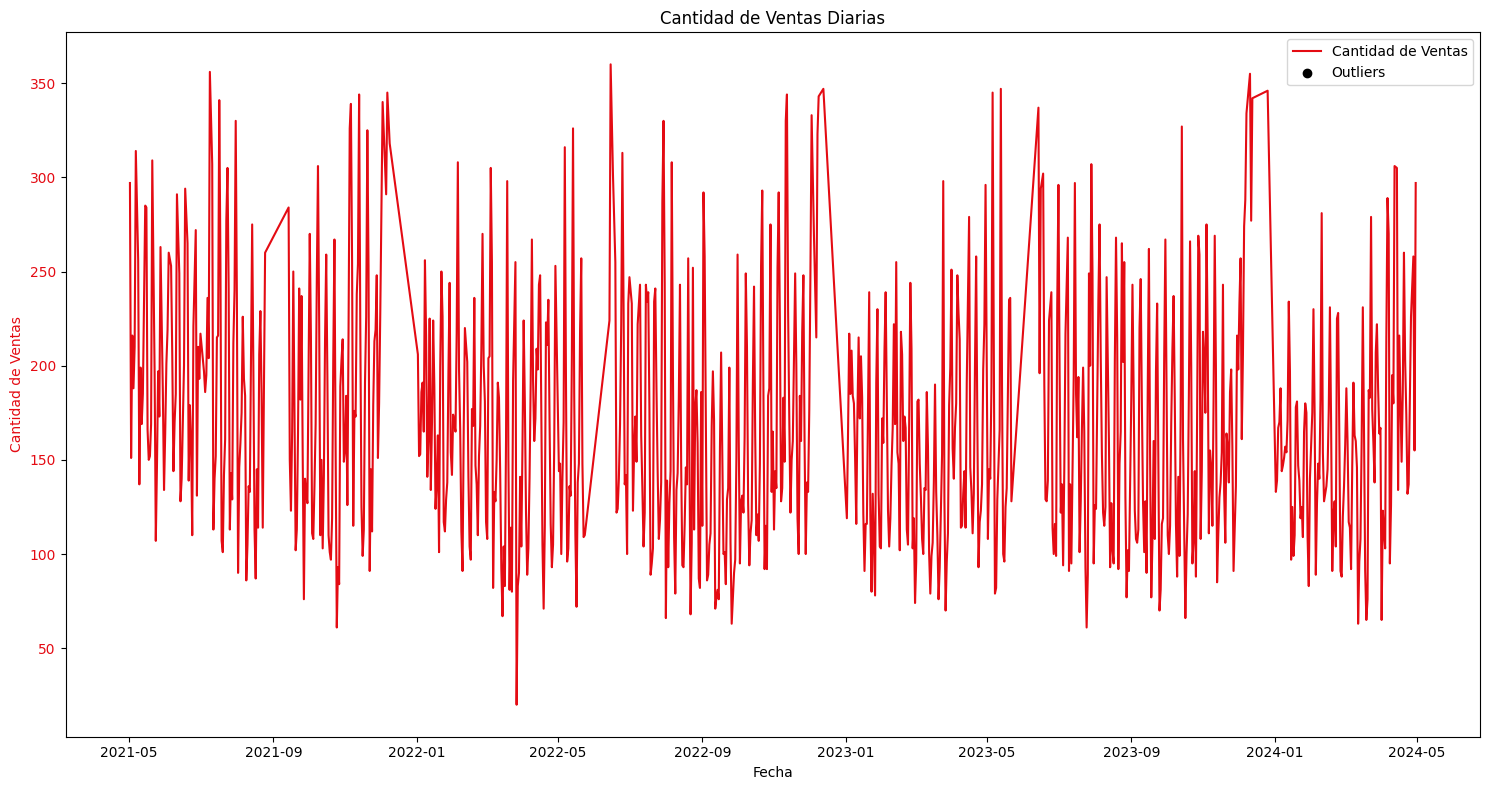

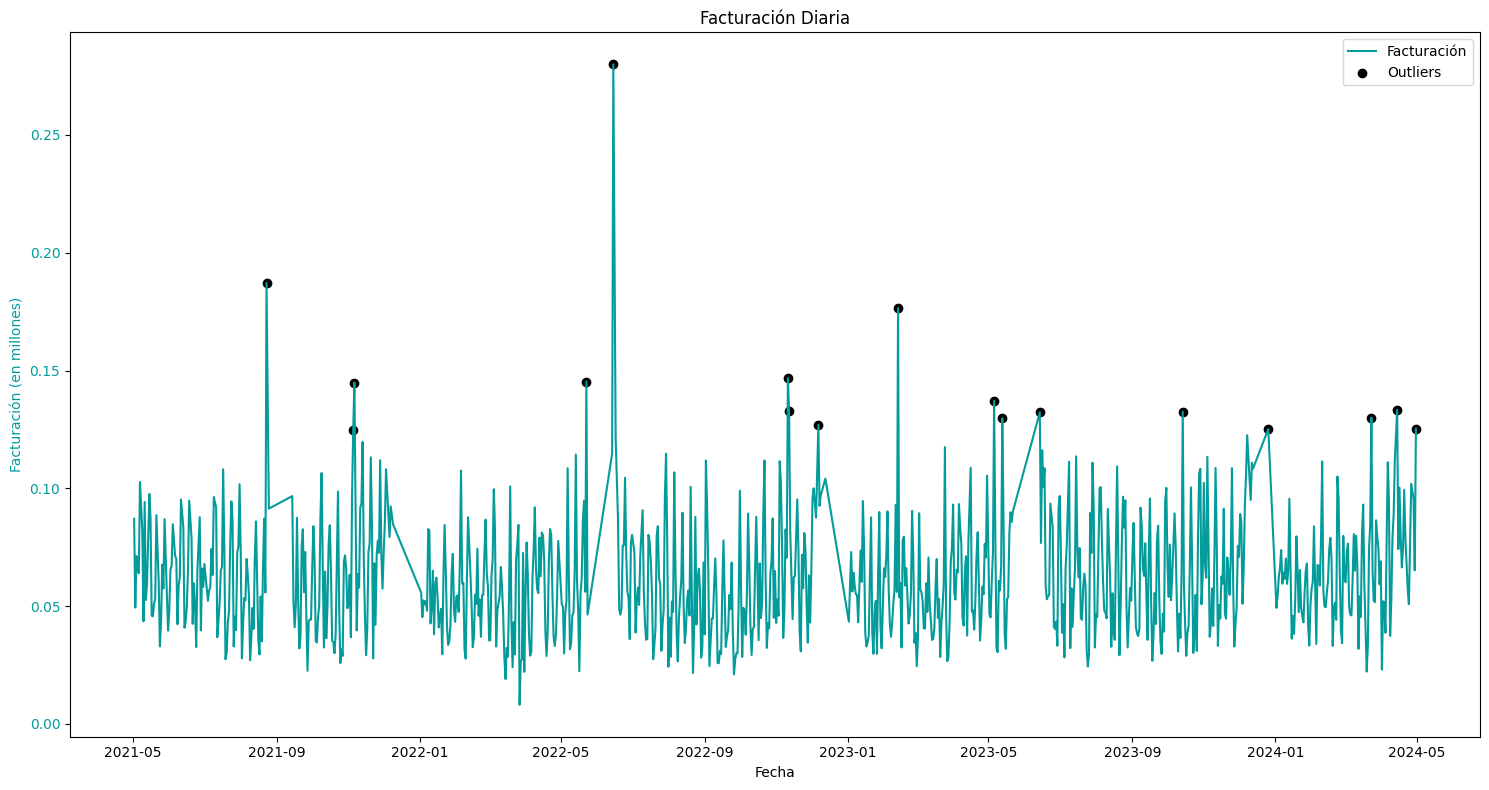

In [27]:
# Contamos el número de ventas antes de la eliminación
ventas_antes = df_merged.shape[0]

# Calculamos los valores atípicos usando el rango intercuartílico (IQR) para la cantidad de ventas diarias
ventas_diarias = df_merged.groupby('Fecha_venta').agg({'Cant_vendidas': 'sum', 'Facturacion': 'sum'}).reset_index()
Q1 = ventas_diarias['Cant_vendidas'].quantile(0.25)
Q3 = ventas_diarias['Cant_vendidas'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = Q3 + 1.5 * IQR

# Identificamos los días con ventas atípicas
dias_atipicos = ventas_diarias[ventas_diarias['Cant_vendidas'] > outlier_threshold]['Fecha_venta']

# Eliminamos las ventas realizadas en los días atípicos
df_merged = df_merged[~df_merged['Fecha_venta'].isin(dias_atipicos)]

# Contamos el número de ventas después de la eliminación
ventas_despues = df_merged.shape[0]

# Calculamos el número de ventas eliminadas
ventas_eliminadas = ventas_antes - ventas_despues

# Mostramos los resultados
print(f"Cantidad de ventas eliminadas: {ventas_eliminadas}")
print(f"Cantidad de ventas conservadas: {ventas_despues}")
print("\nDataframe Resultante\n")
display(df_merged.head())

# Recalcular las ventas diarias y la facturación diarias con el DataFrame filtrado
ventas_diarias = df_merged.groupby('Fecha_venta').agg({'Cant_vendidas': 'sum', 'Facturacion': 'sum'}).reset_index()

# Creamos el gráfico de líneas para la cantidad de ventas diarias
fig, ax1 = plt.subplots(figsize=(15, 8))
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Cantidad de Ventas', color=colores_base[0])
ax1.plot(ventas_diarias['Fecha_venta'], ventas_diarias['Cant_vendidas'], color=colores_base[0], label='Cantidad de Ventas')

# Marcamos los valores atípicos
outliers = ventas_diarias[ventas_diarias['Cant_vendidas'] > outlier_threshold]
ax1.scatter(outliers['Fecha_venta'], outliers['Cant_vendidas'], color='black', label='Outliers')
ax1.tick_params(axis='y', labelcolor=colores_base[0])
plt.title('Cantidad de Ventas Diarias')
plt.legend()
plt.tight_layout()
plt.show()

# Calculamos los valores atípicos usando el rango intercuartílico (IQR) para la facturación
Q1_facturacion = ventas_diarias['Facturacion'].quantile(0.25)
Q3_facturacion = ventas_diarias['Facturacion'].quantile(0.75)
IQR_facturacion = Q3_facturacion - Q1_facturacion
outlier_threshold_facturacion = Q3_facturacion + 1.5 * IQR_facturacion

# Creamos el gráfico de líneas para la facturación diaria
fig, ax2 = plt.subplots(figsize=(15, 8))
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Facturación (en millones)', color=colores_base[1])
ax2.plot(ventas_diarias['Fecha_venta'], ventas_diarias['Facturacion'] / 1e6, color=colores_base[1], label='Facturación')

# Marcamos los valores atípicos para la facturación
outliers_facturacion = ventas_diarias[ventas_diarias['Facturacion'] > outlier_threshold_facturacion]
ax2.scatter(outliers_facturacion['Fecha_venta'], outliers_facturacion['Facturacion'] / 1e6, color='black', label='Outliers')
ax2.tick_params(axis='y', labelcolor=colores_base[1])
plt.title('Facturación Diaria')
plt.legend()
plt.tight_layout()
plt.show()

## TO DO LIST

Grafico de ventas con promoción